<a href="https://colab.research.google.com/github/Ranjeet-Patil-19/Thyroid-Cancer-/blob/main/Thyroid_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
df = pd.read_csv('dataset.csv')
df.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

# Split the data
X = df.drop('Recurred', axis=1)
y = df['Recurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


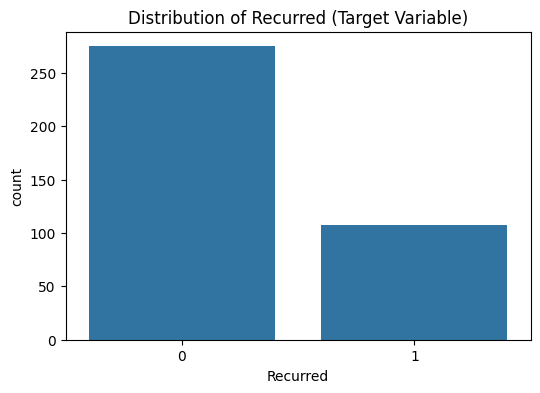

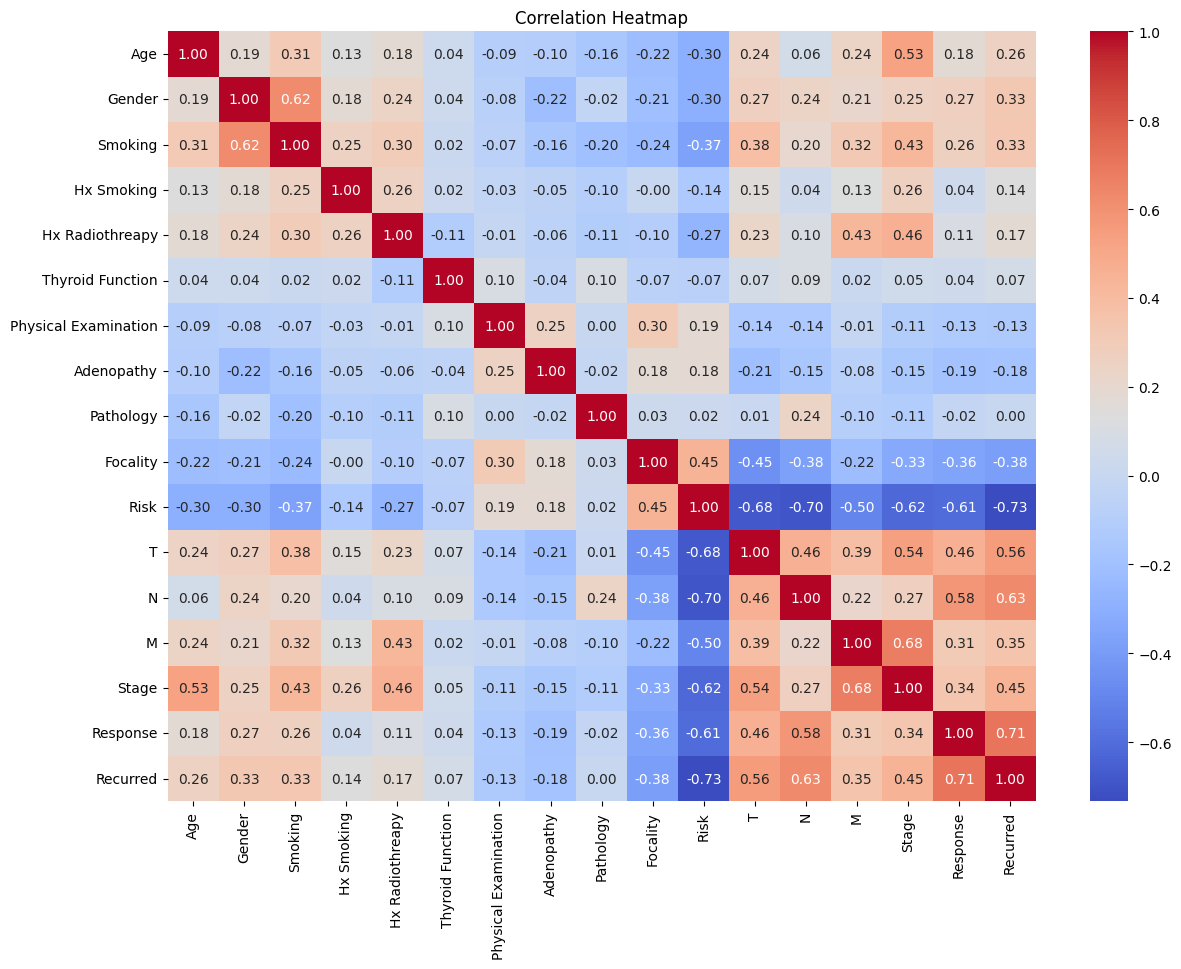

In [ ]:
# Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Recurred', data=df)
plt.title('Distribution of Recurred (Target Variable)')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Define models
models = {"Logistic Regression": LogisticRegression(random_state=42),
          "Random Forest": RandomForestClassifier(random_state=42),
          "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')}

# Stratified K-Folds Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}



In [ ]:
# Train and evaluate models
for model_name, model in models.items():
    cv_accuracy, cv_precision, cv_recall, cv_f1, cv_auc = [], [], [], [], []
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val_cv)
        y_pred_proba = model.predict_proba(X_val_cv)[:, 1]

        cv_accuracy.append(accuracy_score(y_val_cv, y_pred))
        cv_precision.append(precision_score(y_val_cv, y_pred, zero_division=0))
        cv_recall.append(recall_score(y_val_cv, y_pred, zero_division=0))
        cv_f1.append(f1_score(y_val_cv, y_pred, zero_division=0))
        cv_auc.append(roc_auc_score(y_val_cv, y_pred_proba))

    results[model_name] = {'Accuracy': np.mean(cv_accuracy),
                           'Precision': np.mean(cv_precision),
                           'Recall': np.mean(cv_recall),
                           'F1-Score': np.mean(cv_f1),
                           'AUC-ROC': np.mean(cv_auc)}



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
# Display Results
print(pd.DataFrame(results))


           Logistic Regression  Random Forest   XGBoost
Accuracy              0.905235       0.954363  0.954257
Precision             0.870833       0.961270  0.940616
Recall                0.799346       0.877778  0.900000
F1-Score              0.830014       0.915054  0.917421
AUC-ROC               0.934919       0.982347  0.981983


In [ ]:
# Best Model Selection
best_model_name = max(results, key=lambda x: results[x]['AUC-ROC'])
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)


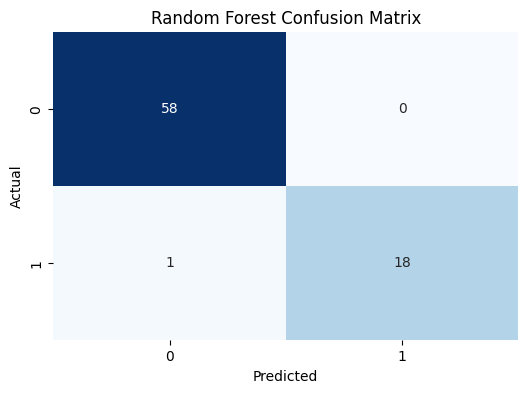

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'{best_model_name} Confusion Matrix')
plt.show()


In [ ]:
# Classification Report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [ ]:
## Step 7: Conclusion
# XGBoost achieved the best performance based on AUC-ROC.
# The model struggled with the minority class due to class imbalance.
# Future improvements could involve addressing class imbalance using SMOTE or class weights.
